# GOLD PRICE PREDICTION-TASK 2

# DATA COLLECTION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('gld_price_data.csv')

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
df.shape

(2290, 6)

In [6]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

Date
['1/2/2008' '1/3/2008' '1/4/2008' ... '5/10/2018' '5/14/2018' '5/16/2018']


# EXPLORATORY DATA ANALYSIS

In [8]:
features_na=[features for features in df.columns if df[features].isnull().sum()>0]
for features in features_na:
    print(features,np.round( df[features].isnull().mean(),4), '%missing values')
else:
    print("No missing value found")

No missing value found


In [9]:
for column in df.columns:
    print(column,df[column].nunique())

Date 2290
SPX 2277
GLD 1930
USO 1514
SLV 1331
EUR/USD 2066


In [10]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['GLD']))]
categorical_features

['Date']

In [11]:
for feature in categorical_features:
    print('the feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

the feature is Date and number of categories are 2290


In [12]:
numerical_feature=[feature for feature in df.columns if ((df[feature].dtypes!='O') & (feature not in ['GLD']))]
print('number of numerical variable:',len(numerical_feature))
df[numerical_feature].head()


number of numerical variable: 4


,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [13]:
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
print("discrete variable count:{}".format(len(discrete_feature)))

discrete variable count:0


In [39]:
continuous_feature=[feature for feature in numerical_feature if feature not in discrete_feature+['GLD']]
print("continuous variable count:{}".format(len(continuous_feature)))

continuous variable count:4


C:\Users\vinotha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vinotha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vinotha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

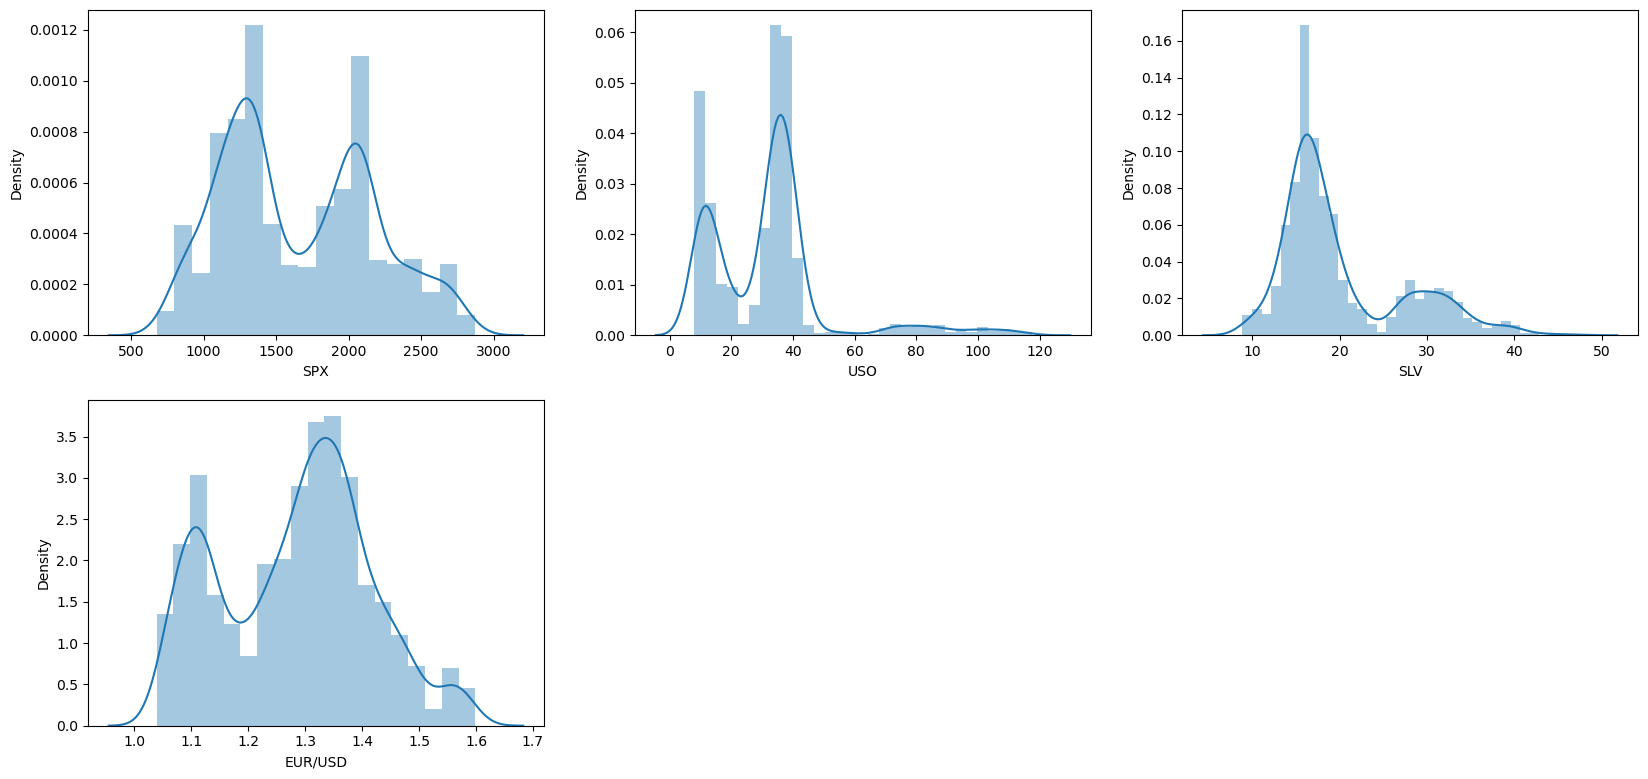

In [40]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for continuous_features in continuous_feature:
    ax=plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_features])
    plt.xlabel(continuous_features)
    plotnumber+=1
plt.show();

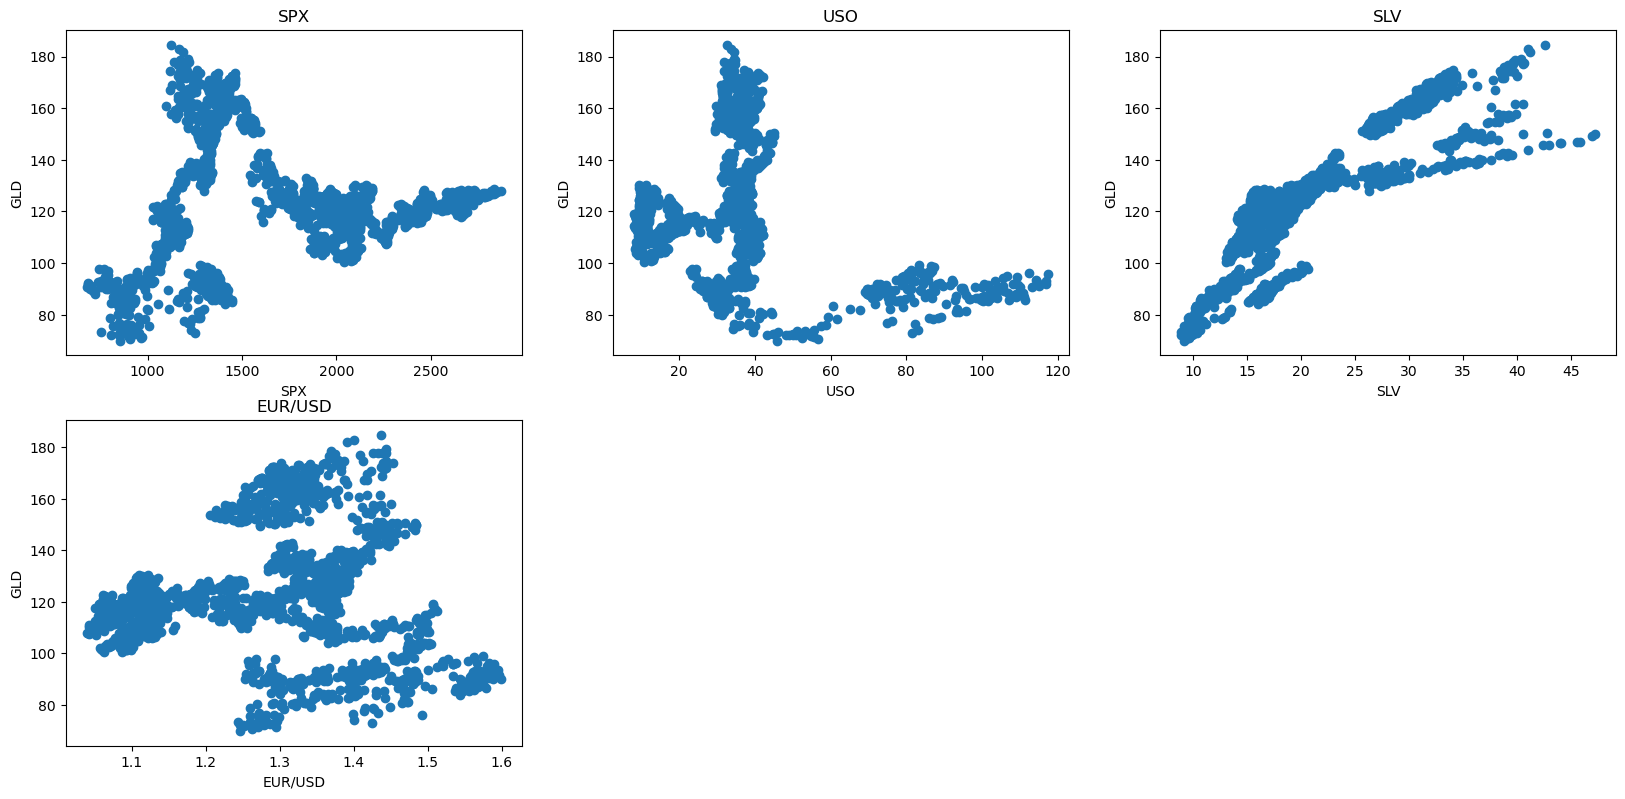

In [38]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for feature in continuous_feature:
    data=df.copy()
    ax=plt.subplot(12,3,plotnumber)
    plt.scatter(data[feature],data['GLD'])
    plt.xlabel(feature)
    plt.ylabel('GLD')
    plt.title(feature)
    plotnumber+=1
plt.show()

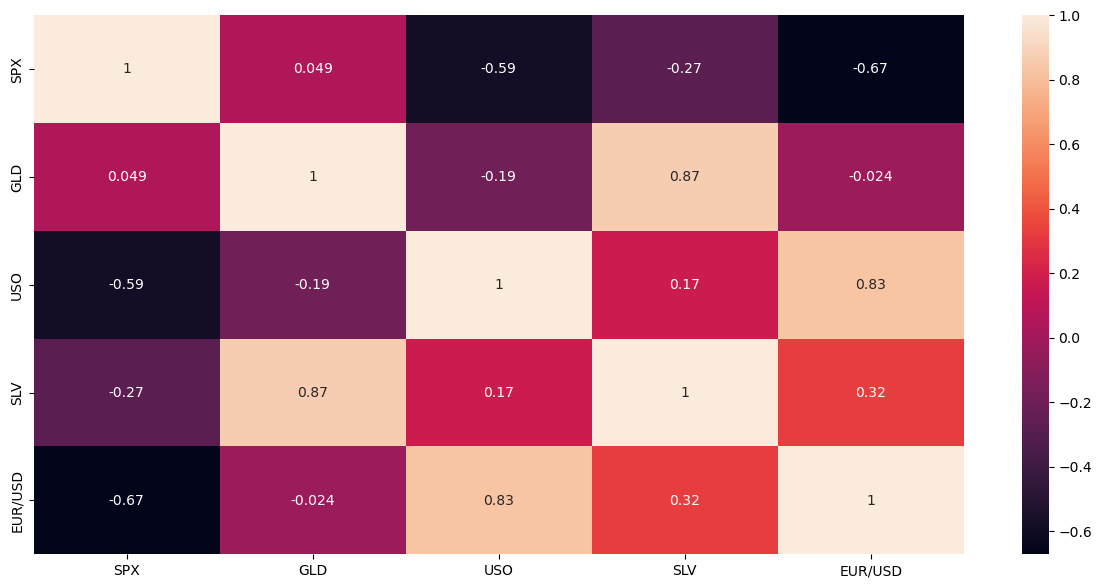

In [17]:
cor_mat=df.corr()
fig=plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)
plt.show()

In [18]:
print(cor_mat['GLD'].sort_values(ascending=False), '\n')

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64 



# FEATURE ENGINEERING

In [19]:
df2=df.copy()

In [20]:
df2.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [21]:
  df2.drop(['Date'],axis=1,inplace=True)

# SPLIT DATASET INTO TRAINING SET AND TEST SET

In [22]:
X=df2.drop(['GLD'],axis=1)
y=df2['GLD']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [23]:
len(X_train)

1832

In [24]:
 len(X_test)

458

In [25]:
X_train

,SPX,USO,SLV,EUR/USD
486,1165.810059,39.560001,16.600000,1.356705
31,1349.989990,75.930000,16.952000,1.467610
1754,2041.890015,10.740000,13.080000,1.087453
1490,1862.760010,31.100000,16.670000,1.280442
1526,2026.140015,23.280001,16.370001,1.239495
...,...,...,...,...
1033,1461.050049,34.119999,33.570000,1.305824
1731,2023.040039,13.060000,13.590000,1.081502
763,1283.500000,36.009998,34.369999,1.427002
835,1218.280029,35.200001,32.330002,1.386001


# BUILDING MODEL

In [26]:
from xgboost import XGBRegressor

In [27]:
model_xgb=XGBRegressor(learning_rate=0.5,max_depth=3,n_estimators=200)

In [28]:
model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# ACCURACY

In [29]:
model_xgb.score(X_test,y_test)*100


98.75798991169574

In [30]:
y_pred=model_xgb.predict(X_test)

In [31]:
y_pred

array([127.83968 , 117.78003 , 139.86362 , 121.72129 ,  91.45914 ,
       150.29877 , 117.72737 , 112.97666 , 148.61874 , 105.00025 ,
       102.307045, 119.127556,  91.814926, 155.26105 , 121.58247 ,
       117.40806 ,  85.852165,  90.79795 ,  91.66415 , 124.19409 ,
        82.25382 , 118.25713 , 127.26382 , 174.63809 , 173.54956 ,
       139.62447 , 114.931145, 160.5232  , 133.16188 , 115.47771 ,
       109.895065, 105.13089 , 129.16321 , 121.94389 , 101.23032 ,
       119.902405,  83.509834, 115.2284  , 126.30069 , 139.80621 ,
       108.75211 , 128.74828 , 101.58659 , 138.98744 , 135.0287  ,
       150.4273  , 118.71637 , 160.68329 , 150.95863 , 127.303375,
       117.543015, 114.32274 , 125.42216 , 118.27691 , 152.87804 ,
       124.0259  , 112.059265,  86.76846 , 155.93192 , 118.46649 ,
        87.29648 , 115.03043 ,  84.1512  , 146.00029 , 125.15785 ,
       127.68587 , 125.2775  , 120.90435 , 168.3814  , 122.42993 ,
       125.94005 , 173.56548 , 122.900635, 169.93297 , 118.110

In [32]:
y_test

1255    128.789993
2100    115.620003
711     139.220001
1328    120.930000
53       93.040001
           ...    
2085    120.360001
1362    129.130005
828     159.869995
567     117.339996
1693    106.379997
Name: GLD, Length: 458, dtype: float64

# CONLUSION


### In conclusion, I was able to achieve an accuracy of 98.75% in gold prediction using machine learning techniques in Python.